<h1 align="center"> CSEN 1022 Assignment Submission </h1> 

## Please don't forget to fill in this data
Member 1 Name: Andrew Ayman Alfy

Member 1 ID: 40-9874

Member 1 Tutorial: T-07

Member 2 Name: Youssef Abobakr

Member 2 ID: 40-14040

Member 2 Tutorial: T-05

## Imports (Don't Edit)

In [1]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data (Don't Edit)

In [2]:
# Read Training Images, Testing Images, Training Labels, Testing Labels
train = np.array([plt.imread('Data/Train/'+str(i)+'.jpg').reshape(-1) for i in range (1,2401)])
test = np.array([plt.imread('Data/Test/'+str(i)+'.jpg').reshape(-1) for i in range (1,201)])
train_labels = np.loadtxt('Data/Train/Training Labels.txt')
test_labels = np.loadtxt('Data/Test/Test Labels.txt')
print(train.shape, test.shape)
print(train_labels.shape,test_labels.shape)

(2400, 784) (200, 784)
(2400,) (200,)


## Quantize Images

In [4]:
def create_level(level):
    result = np.zeros(level+1)
    threshold_width = 256/level
    for i in range(1,level+1):
        result[i] = int(threshold_width * i)
    return result

def quantize_images(level, dataset):
    if(level>= 256):
        res = dataset
        return res
    res = np.zeros((dataset.shape[0], 784))
    quantization_array = create_level(level)
    for image in range(dataset.shape[0]):
        for pixel in range(784):
            pixel_value = dataset[image][pixel]
            quantized_value = 0
            for i in range (1, len(quantization_array)):
                if(pixel_value < quantization_array[i]):
                    break
                else:
                    quantized_value = quantization_array[i]
            res[image][pixel] = int(quantized_value)
    return res

### Quantized Datasets

In [5]:
quantized2 = quantize_images(2, train)
quantized4 = quantize_images(4, train)
quantized8 = quantize_images(8, train)
quantized16 = quantize_images(16, train)
quantized32 = quantize_images(32, train)

In [6]:
quantized64 = quantize_images(64, train)

In [7]:
quantized128 = quantize_images(128, train)

In [8]:
quantized256 = quantize_images(256,train)

In [9]:
quantized_test_2 = quantize_images(2, test)
quantized_test_4 = quantize_images(4, test)
quantized_test_8 = quantize_images(8, test)
quantized_test_16 = quantize_images(16, test)
quantized_test_32 = quantize_images(32, test)

In [10]:
quantized_test_64 = quantize_images(64, test)

In [11]:
quantized_test_128 = quantize_images(128, test)

In [12]:
quantized_test_256 = quantize_images(256, test)

## Compute Naive Bayes
 

In [32]:
def prob_pixel_given_class(_class, value, index):
    number_of_occ = 0
    for i in range(_class.shape[0]):
        if(_class[i][index] == value):
            number_of_occ += 1
    
    return number_of_occ / _class.shape[0]

In [34]:
prob_quant_2 = np.zeros((2,784,10))
prob_quant_4 = np.zeros((4,784,10))  
prob_quant_8 = np.zeros((8,784,10))  
prob_quant_16 = np.zeros((16,784,10))  
prob_quant_32 = np.zeros((32,784,10))  
prob_quant_64 = np.zeros((64,784,10))  
prob_quant_128 = np.zeros((128,784,10)) 
prob_quant_256 = np.zeros((256,784,10))  

In [37]:
def calc_level_prob(level, train):
    if level == 2:
        helper(level,train, prob_quant_2)
    elif level == 4:
        helper(level,train, prob_quant_4)
    elif level == 8:
        helper(level,train, prob_quant_8)
    elif level == 16:
        helper(level,train, prob_quant_16)
    elif level == 32:
        helper(level,train, prob_quant_32)
    elif level == 64:
        helper(level,train, prob_quant_64)
    elif level == 128:
        helper(level,train, prob_quant_128)
    elif level == 256:
        helper(level,train, prob_quant_256)

In [41]:
def helper(level, train, array):
    threshold_step = 256/level
    for i in range(array.shape[0]):
        threshold = threshold_step*i
        for pixel in range(784):
            for _class in range(10):
                array[i][pixel][_class] = prob_pixel_given_class(train[_class*240:(_class+1)*240], threshold, pixel)

In [19]:
calc_level_prob(2, quantized2)
calc_level_prob(4, quantized4)



In [20]:
calc_level_prob(8, quantized8)
calc_level_prob(16, quantized16)


In [21]:
calc_level_prob(32, quantized32)
calc_level_prob(64, quantized64)


In [22]:
calc_level_prob(128, quantized128)

In [23]:
calc_level_prob(256, quantized256)

In [25]:
def classify(array_of_prob, test):
    probs = np.ones((200,10))
    prob_in_class = 1
    quantization_level = array_of_prob.shape[0]
    width = 256/quantization_level
    
    for image in range(test.shape[0]):
        for _class in range(10):
            for pixel in range(784):
                index = int(test[image][pixel] // width)
                prob_in_class *= array_of_prob[index][pixel][_class]
            probs[image][_class] = prob_in_class
            prob_in_class = 1
    return probs

In [27]:
res = np.zeros((8,200,10))

res[0] = classify(prob_quant_2, quantized_test_2)
res[1] = classify(prob_quant_4, quantized_test_4)
res[2] = classify(prob_quant_8, quantized_test_8)
res[3] = classify(prob_quant_16, quantized_test_16)
res[4] = classify(prob_quant_32, quantized_test_32)
res[5] = classify(prob_quant_64, quantized_test_64)
res[6] = classify(prob_quant_128, quantized_test_128)
res[7] = classify(prob_quant_256, quantized_test_256)

In [72]:
list = np.zeros((8,10,10))
for level in range(res.shape[0]):
    for _class in range(10):
        for image in range(200):
            if(image<(_class+1)*20 and image >= (_class*20)):
                classification = np.argmax(res[level][image])
                list[level][_class][classification] += 1


In [86]:
list_of_accuracy = np.zeros((8))
for level in range (8):
    accuracy =0
    for _class in range(10):
        for image in range (10):
            if (_class==image):
                accuracy+= list[level][_class][image]
    list_of_accuracy[level]=accuracy/200

In [100]:
# Make sure you return these two lists
list_of_confusion_matrices = list
list_of_accuracies=list_of_accuracy 

## Plot confusion matrices and accuracy for each quantization level (Don't edit)

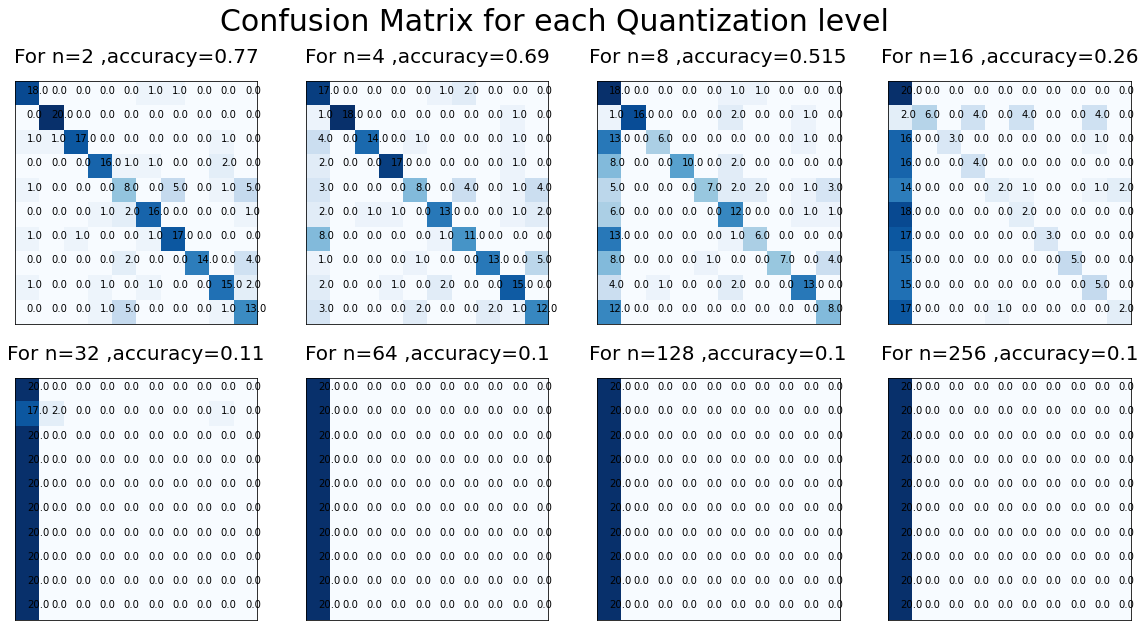

In [101]:
# PLEASE DON'T EDIT THIS CELL
bits = [2,4,8,16,32,64,128,256]
confusion_matrices = list_of_confusion_matrices
accuracies = list_of_accuracies

fig, axs = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle("Confusion Matrix for each Quantization level",fontsize=30)
for pi in range(0,axs.shape[0]):
    for pj in range(0,axs.shape[1]):
        index = np.round(pi*4+pj)
        cm = confusion_matrices[index]
        axs[pi,pj].matshow(cm,cmap="Blues")
        for i in range(0,cm.shape[0]):
            for j in range(0,cm.shape[1]):
                axs[pi,pj].set_xticks([])
                axs[pi,pj].set_yticks([])
                axs[pi,pj].annotate(cm[i,j],(j,i))
                axs[pi,pj].set_title("For n="+str(bits[index])+" ,accuracy="+str(accuracies[index]),fontsize=20)

## Plot accuracy levels for each quantization level (Don't edit)

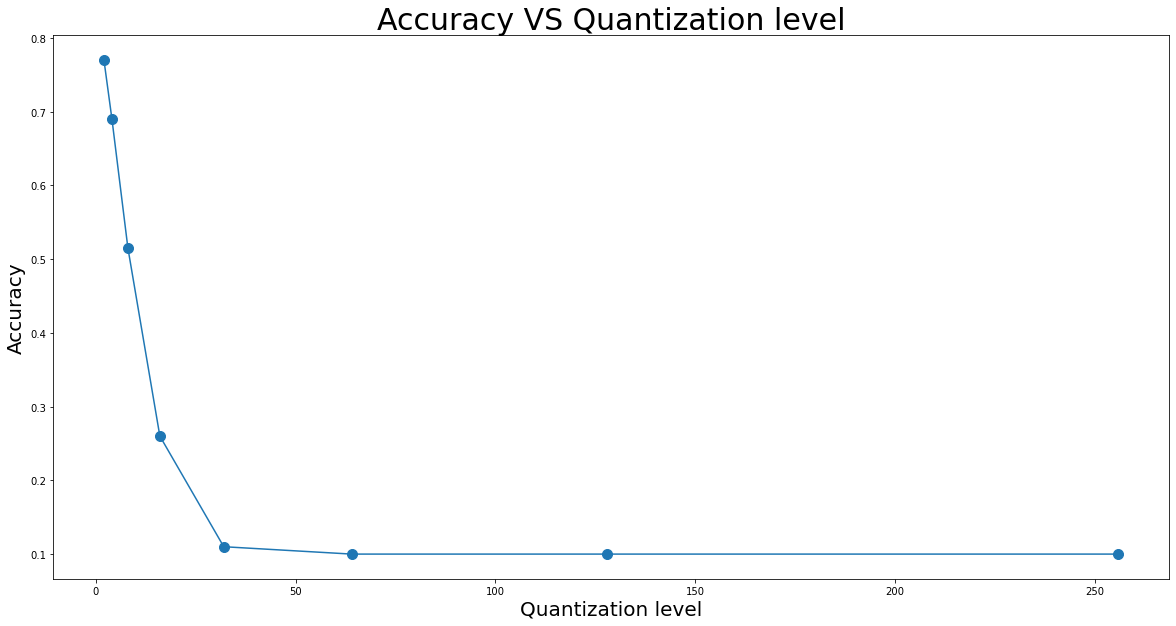

In [102]:
# PLEASE DON'T EDIT THIS CELL
plt.rc('figure', figsize=[20,10])
plt.title("Accuracy VS Quantization level",fontsize=30)
plt.xlabel("Quantization level",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.plot(bits,accuracies,marker='o',markersize=10)

---

## Compute Naive Bayes (replace probabilities of 0 with value in assignment)

In [98]:
def prob_pixel_given_class_after_replacement(_class, value, index):
    number_of_occ = 0
    for i in range(_class.shape[0]):
        if(_class[i][index] == value):
            number_of_occ += 1
    if(number_of_occ == 0):
        number_of_occ = 0.00001
    return number_of_occ / _class.shape[0]

In [99]:
prob_quant_2_after_replacement = np.zeros((2,784,10))
prob_quant_4_after_replacement = np.zeros((4,784,10))  
prob_quant_8_after_replacement= np.zeros((8,784,10))  
prob_quant_16_after_replacement = np.zeros((16,784,10))  
prob_quant_32_after_replacement = np.zeros((32,784,10))  
prob_quant_64_after_replacement = np.zeros((64,784,10))  
prob_quant_128_after_replacement = np.zeros((128,784,10)) 
prob_quant_256_after_replacement = np.zeros((256,784,10))  

In [42]:
def helper_with_replacement(level, train, array):
    threshold_step = 256/level
    for i in range(array.shape[0]):
        threshold = threshold_step*i
        for pixel in range(784):
            for _class in range(10):
                array[i][pixel][_class] = prob_pixel_given_class_after_replacement(train[_class*240:(_class+1)*240], threshold, pixel)

In [38]:
def calc_level_prob_after_replacement(level, train):
    if level == 2:
        helper_with_replacement(level,train, prob_quant_2_after_replacement)
    elif level == 4:
        helper_with_replacement(level,train, prob_quant_4_after_replacement)
    elif level == 8:
        helper_with_replacement(level,train, prob_quant_8_after_replacement)
    elif level == 16:
        helper_with_replacement(level,train, prob_quant_16_after_replacement)
    elif level == 32:
        helper_with_replacement(level,train, prob_quant_32_after_replacement)
    elif level == 64:
        helper_with_replacement(level,train, prob_quant_64_after_replacement)
    elif level == 128:
        helper_with_replacement(level,train, prob_quant_128_after_replacement)
    elif level == 256:
        helper_with_replacement(level,train, prob_quant_256_after_replacement)

In [43]:

calc_level_prob_after_replacement(2, quantized2)
calc_level_prob_after_replacement(4, quantized4)
calc_level_prob_after_replacement(8, quantized8)

calc_level_prob_after_replacement(16, quantized16)
calc_level_prob_after_replacement(32, quantized32)

calc_level_prob_after_replacement(64, quantized64)
calc_level_prob_after_replacement(128, quantized128)

calc_level_prob_after_replacement(256, quantized256)

In [47]:
res2 = np.zeros((8,200,10))

res2[0] = classify(prob_quant_2_after_replacement, quantized_test_2)
res2[1] = classify(prob_quant_4_after_replacement, quantized_test_4)
res2[2] = classify(prob_quant_8_after_replacement, quantized_test_8)
res2[3] = classify(prob_quant_16_after_replacement, quantized_test_16)
res2[4] = classify(prob_quant_32_after_replacement, quantized_test_32)
res2[5] = classify(prob_quant_64_after_replacement, quantized_test_64)
res2[6] = classify(prob_quant_128_after_replacement, quantized_test_128)
res2[7] = classify(prob_quant_256_after_replacement, quantized_test_256)

In [65]:
                
list2 = np.zeros((8,10,10))
for level in range(res2.shape[0]):
    for _class in range(10):
        for image in range(200):
            if(image<(_class+1)*20 and image >= (_class*20)):
                classification = np.argmax(res2[level][image])
                list2[level][_class][classification] += 1
                


In [103]:
list_of_accuracy_modified = np.zeros((8))
for level in range (8):
    accuracy =0
    for _class in range(10):
        for image in range (10):
            if (_class==image):
                accuracy+= list2[level][_class][image]
    list_of_accuracy_modified[level]=accuracy/200

In [104]:
# Make sure you return these two lists
list_of_confusion_matrices = list2
list_of_accuracies =list_of_accuracy_modified

## Plot confusion matrices and accuracy for each quantization level (Don't edit)

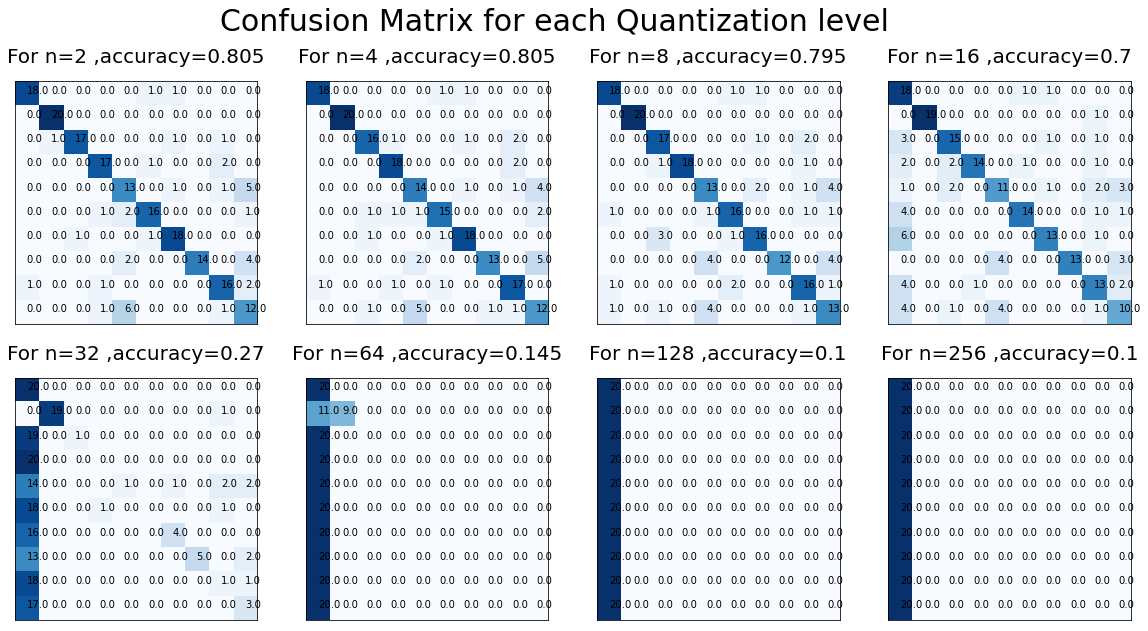

In [105]:
# PLEASE DON'T EDIT THIS CELL
bits = [2,4,8,16,32,64,128,256]
confusion_matrices = list_of_confusion_matrices
accuracies = list_of_accuracies

fig, axs = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle("Confusion Matrix for each Quantization level",fontsize=30)
for pi in range(0,axs.shape[0]):
    for pj in range(0,axs.shape[1]):
        index = np.round(pi*4+pj)
        cm = confusion_matrices[index]
        axs[pi,pj].matshow(cm,cmap="Blues")
        for i in range(0,cm.shape[0]):
            for j in range(0,cm.shape[1]):
                axs[pi,pj].set_xticks([])
                axs[pi,pj].set_yticks([])
                axs[pi,pj].annotate(cm[i,j],(j,i))
                axs[pi,pj].set_title("For n="+str(bits[index])+" ,accuracy="+str(accuracies[index]),fontsize=20)

## Plot accuracy levels for each quantization level (Don't edit)

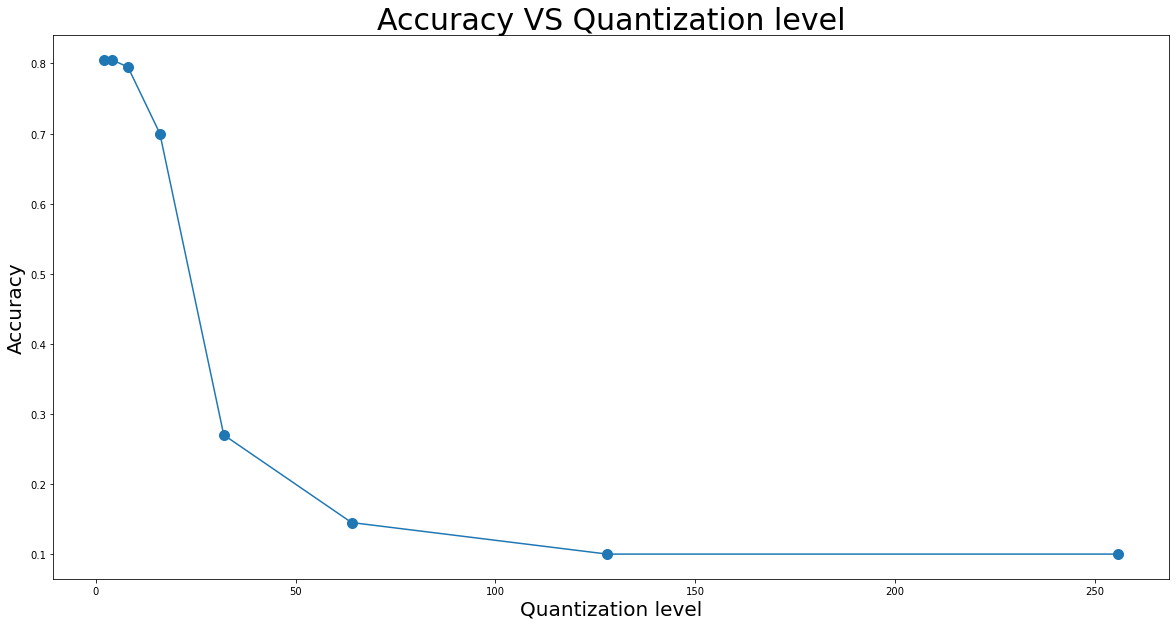

In [106]:
# PLEASE DON'T EDIT THIS CELL
plt.rc('figure', figsize=[20,10])
plt.title("Accuracy VS Quantization level",fontsize=30)
plt.xlabel("Quantization level",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.plot(bits,accuracies,marker='o',markersize=10)